Plot the dependency between two similarity metrics

<h2>Import packages and data</h2>

In [1]:
from scipy.io import netcdf
import similarity_measures as sim
import calculations as calc
import plots
import numpy as np

In [2]:
nc_l30 = netcdf.netcdf_file("data/era-int_pl_1979-2019-mm-l30-u.nc")

<h2>Derive QBO</h2>

In [3]:
lon = calc.convert_coordinates_to_grid(nc_l30.variables["longitude"][:], 180)
lat = calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 0)

lon_step = 256 #Around the whole equator
lat_step = calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 0) - calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 5)


u_l30 = nc_l30.variables["u"]

#Deseasonalize
u_l30 = calc.deseasonalize_map(u_l30)

qbo_equator = calc.derive(u_l30[:, :, :, :], lat, lon, 0, lat_step, lon_step)

<h2>Calculate and plot dependency between two similarity metrics</h2>

In [4]:
print(plots.plot_similarity_dependency.__doc__)


    Plot a matrix of dependcies between two similarity metrics with one similarity
    metric on the x-axis and one on the y-axis

    Args:
        map_array (numpy.ndarray): Map with 4 dimensions - time, level, latitude, longitude
        reference_series (numpy.ndarray): 1 dimensional reference series
        metrics (list): List of similarity metrics to compute similarity between two time series
        labels (list): List of labels for the metrics
        level (int, optional): Level on which the similarity should be calculated
            Defaults to 0
    


<h4>Pearson's Correlation vs Mutual Information vs Transfer Entropy vs Manhattan Distance</h4>

In [5]:
metrics = [sim.pearson_correlation, sim.mutual_information, sim.transfer_entropy, sim.manhattan_distance]

In [6]:
metric_labels = ["Pearson's Correlation", "Mutual Information", "Transfer Entropy", "Manhattan Distance"]

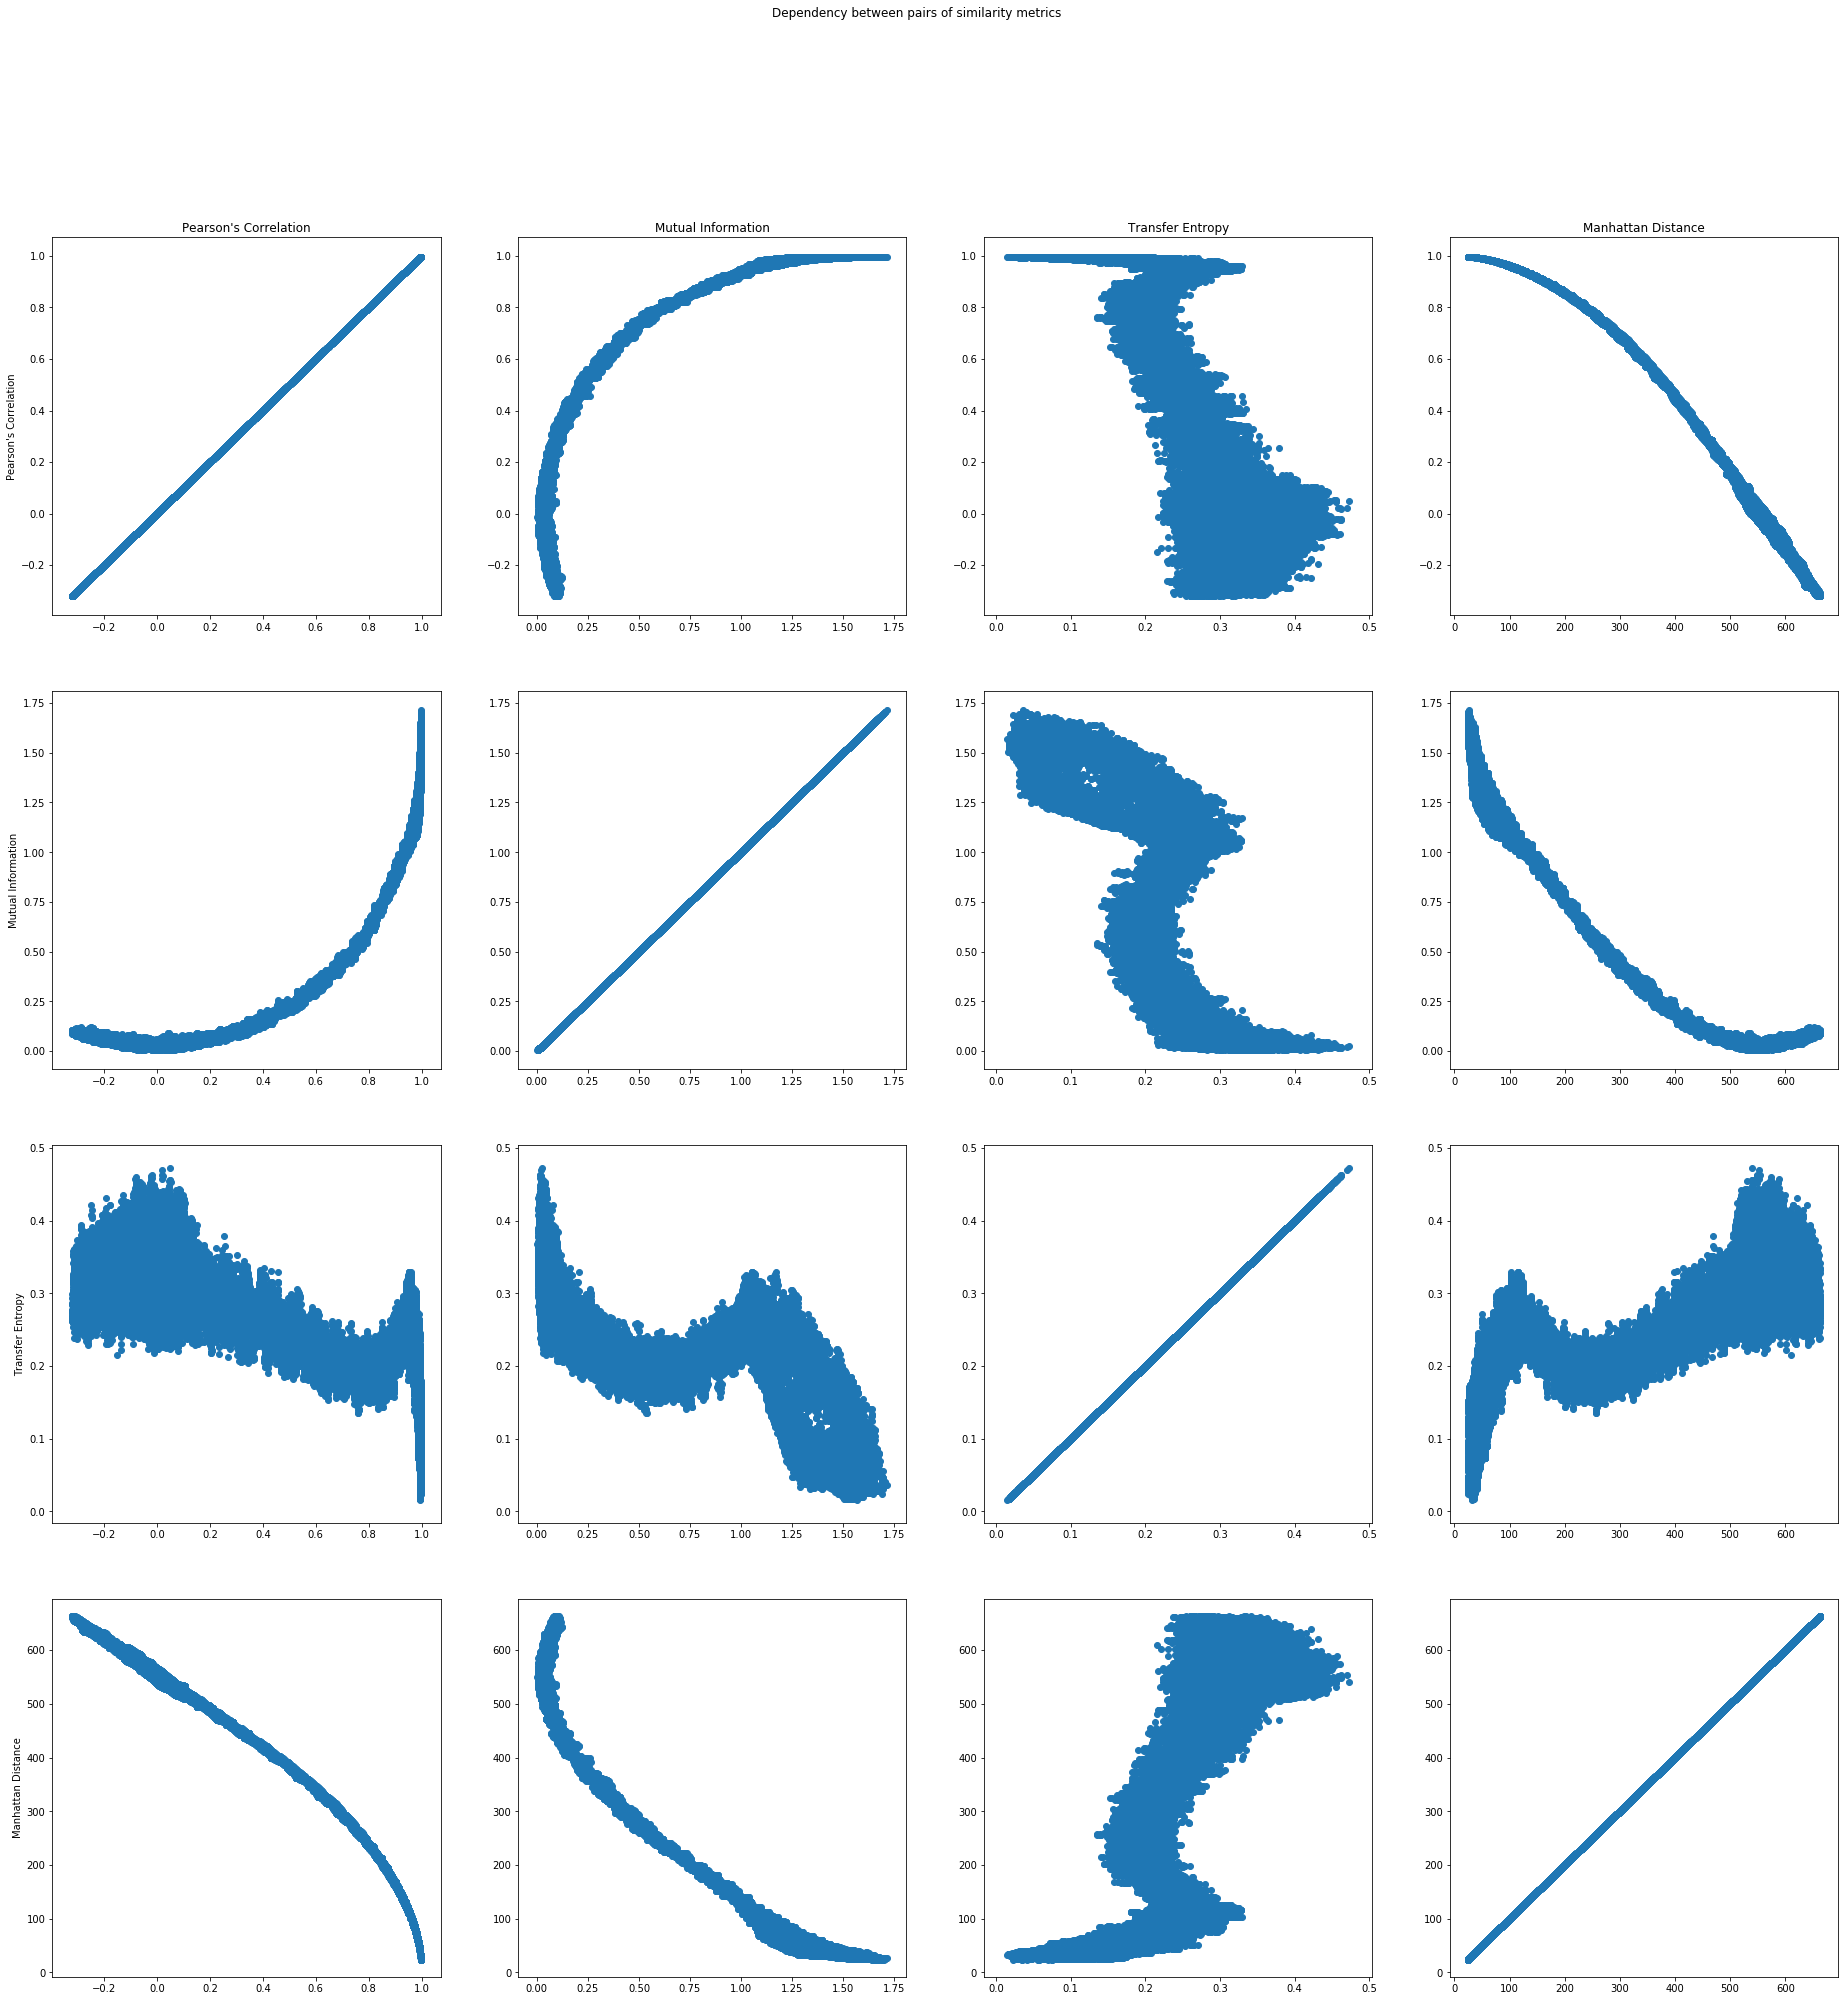

In [7]:
plots.plot_similarity_dependency(u_l30, qbo_equator, metrics, metric_labels)

<h2>Combine similarity metrics</h2>

In [8]:
print(plots.combine_similarity_metrics.__doc__)


    Plot a matrix of combinations of two similarity metrics. The combination_func defines how the
    values are combined.

    Before the values are combined, they are binned in 10% bins using
    calculations.binning_values_to_quantiles.

    Args:
        map_array (numpy.ndarray): Map with 4 dimensions - time, level, latitude, longitude
        reference_series (numpy.ndarray): 1 dimensional reference series
        combination_func (function): Function that comines two similarity values into one
        metrics (list): List of similarity metrics to compute similarity between two time series
        labels (list): List of labels for the metrics
        level (int, optional): Level on which the similarity should be calculated
            Defaults to 0
    


In [9]:
metrics = [sim.pearson_correlation, sim.mutual_information, plots.invert(sim.transfer_entropy), plots.invert(sim.manhattan_distance)]

In [10]:
combination_func = (lambda x, y: x * y)

C:\Users\tousp\Climate-Similarity-Metrics\plots.py:264: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(projection='mill', lon_0=30, resolution='l', ax=ax[i][j])


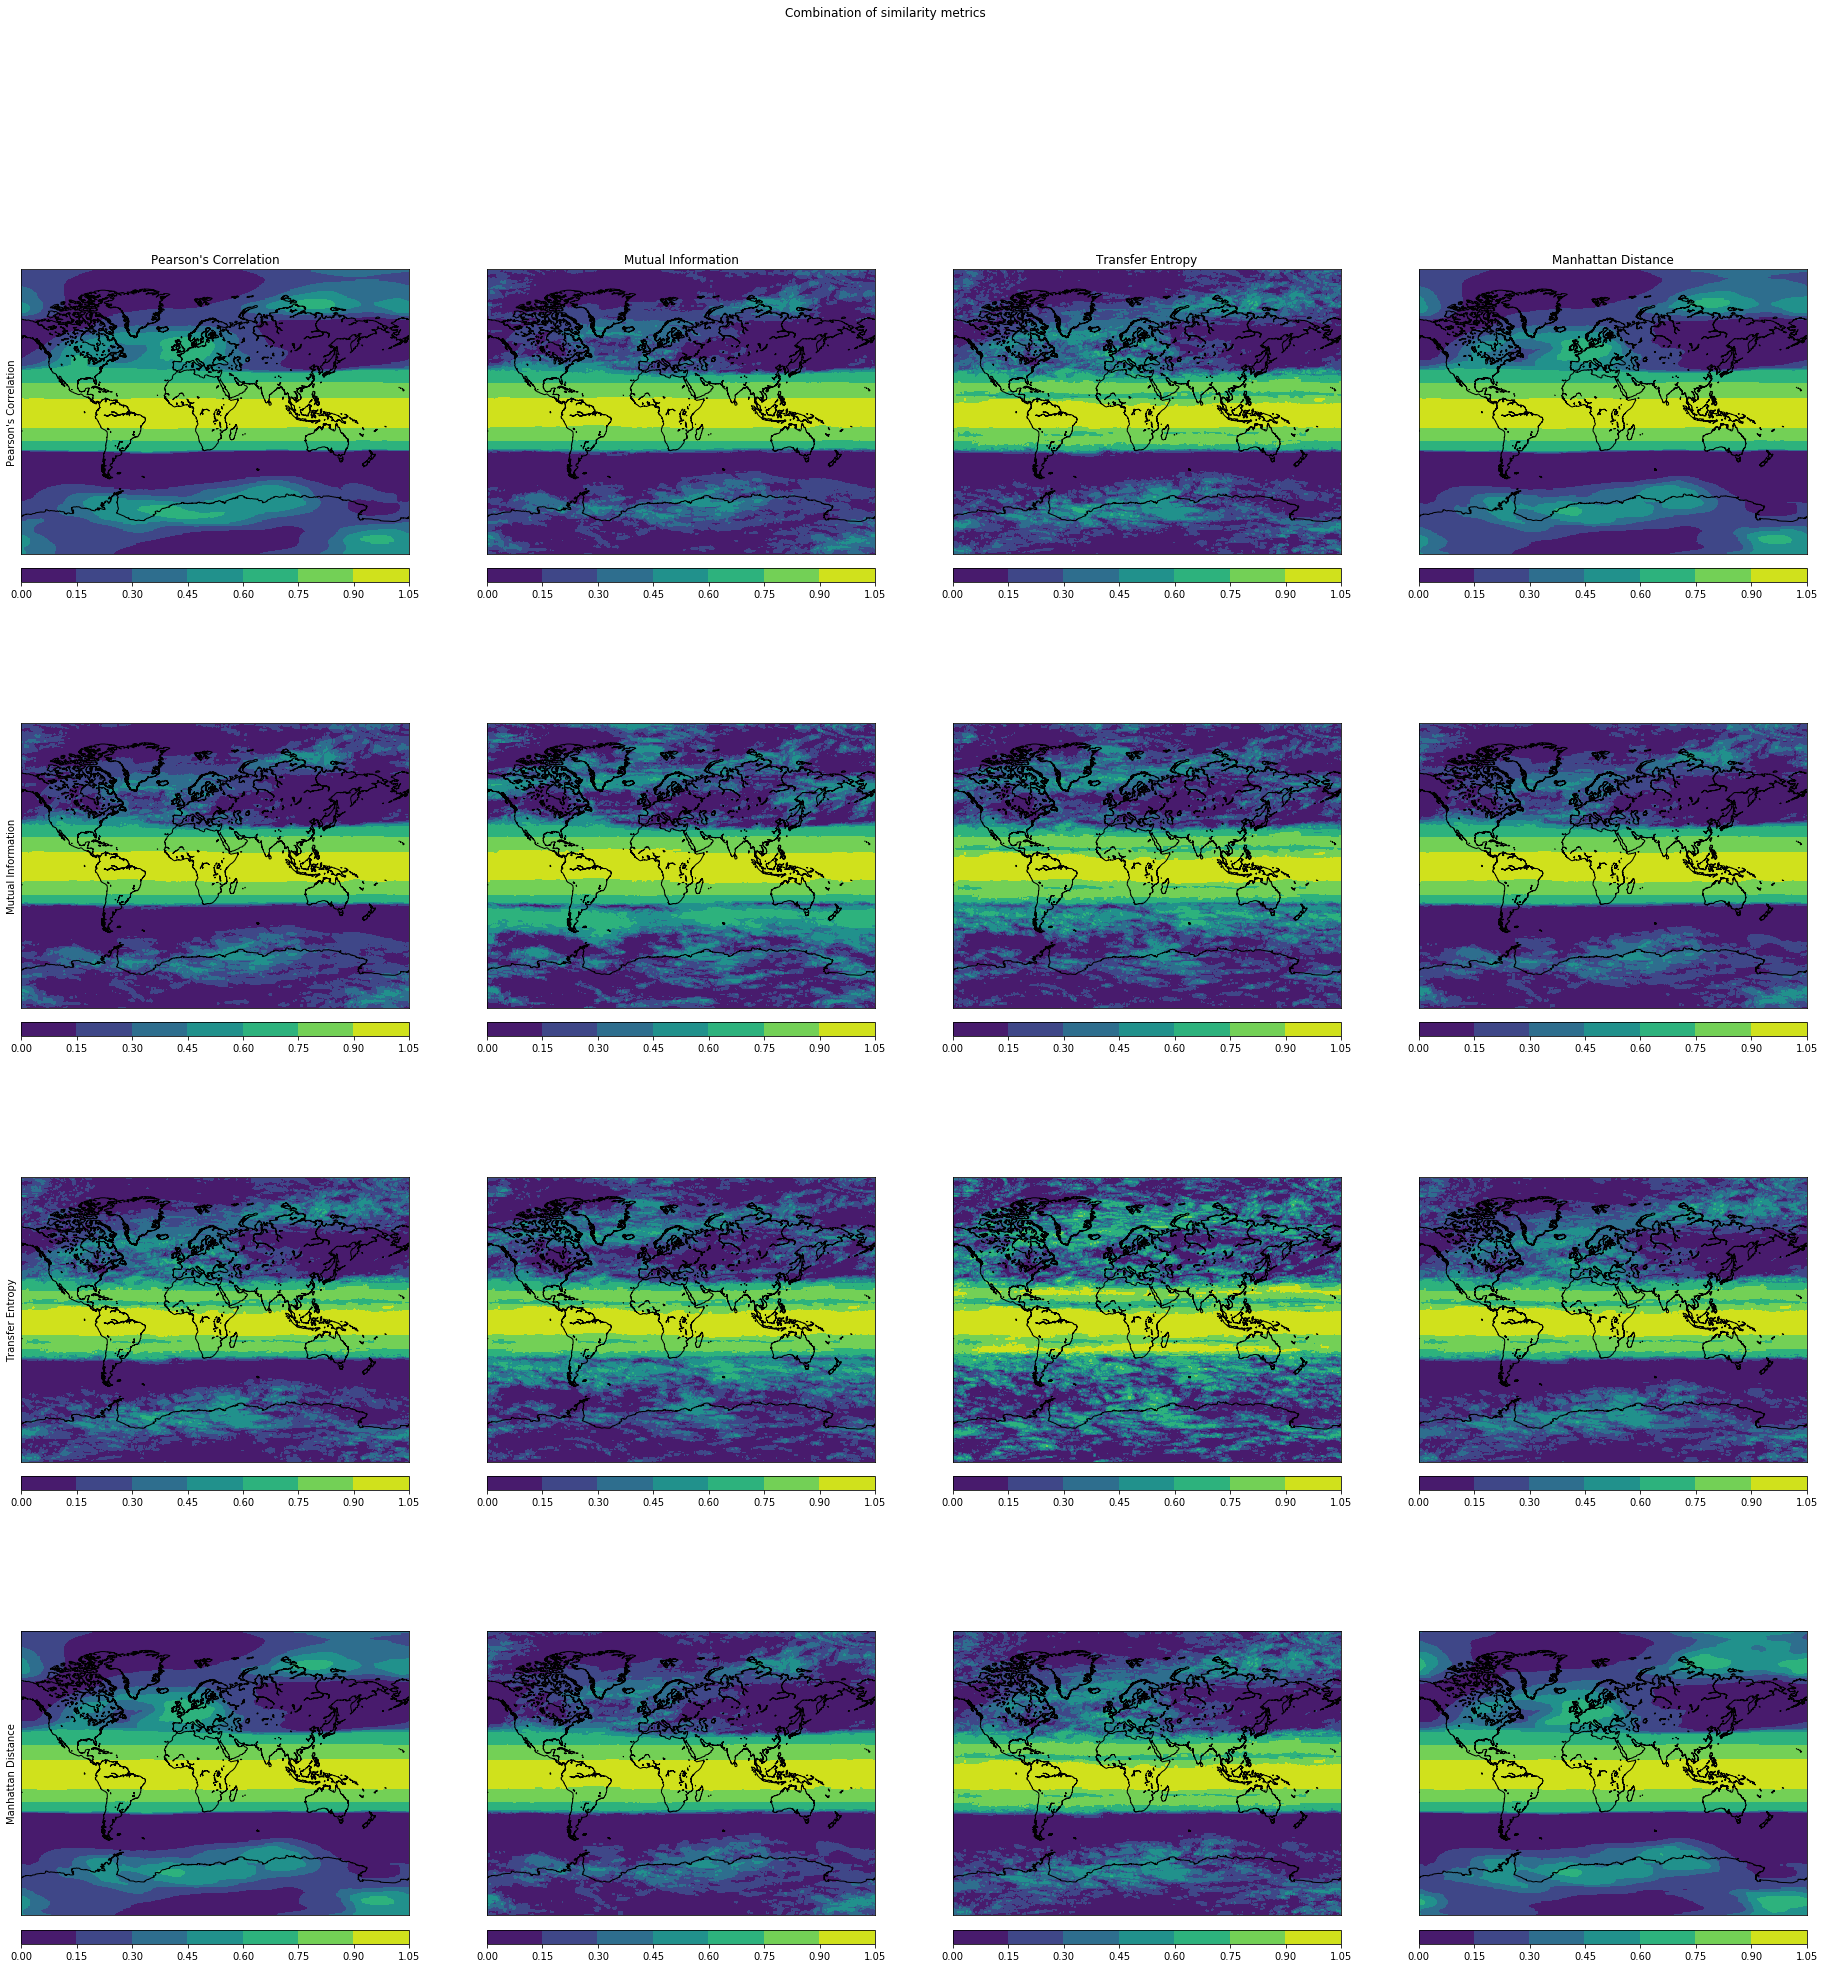

In [11]:
plots.combine_similarity_metrics(u_l30, qbo_equator, combination_func, metrics, metric_labels)